In [1]:
import tensorflow as tf
import os
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"]= "2"
print("tensorflow Version is: " + str(tf.__version__))

import numpy as np
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import backend as K
print(os.environ['KERAS_BACKEND'])

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow Version is: 1.8.0
tensorflow


Using TensorFlow backend.


In [2]:
#Fashion MNIST Dataset CNN model development: https://github.com/zalandoresearch/fashion-mnist
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils, losses, optimizers
import matplotlib.pyplot as plt

In [3]:
#no. of classes
num_classes = 10

# batch size and training iterations (epochs)
batch_size = 128
epochs = 24

#input image dimensions
img_rows,img_cols = 28,28

(60000, 28, 28) train set
(10000, 28, 28) test set
Label Index: 9 Fashion Labels: Ankle boot


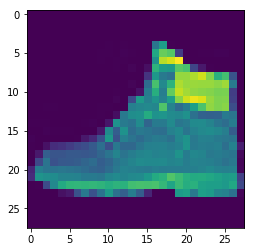

In [4]:
#data for train and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, 'train set')
print(x_test.shape, 'test set')

# Define the text labels
fashion_mnist_labels = ["Top",          # index 0
                        "Trouser",      # index 1
                        "Jumper",       # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Trainer",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index=90
label_index = y_train[img_index]
plt.imshow(x_train[img_index])
print('Label Index: ' + str(label_index) + " Fashion Labels: " + (fashion_mnist_labels[label_index]))

In [5]:
#type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#one-hot encoding
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test,  num_classes)

#formatting issues for depth of image (greyscale = 1) with different kernels (tensorflow, cntk, etc)
if K.image_data_format()== 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [6]:
#Define the CNN model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
__________

In [7]:
#compile - how to measure loss
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])

#train the model and return loss and accuracy for each epoch - history dictionary
start = time.time()
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = time.time()

#evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])
print('Time to run: ', (end-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 7s 115us/step - loss: 0.6439 - acc: 0.7649 - val_loss: 0.4121 - val_acc: 0.8515
Epoch 2/24
60000/60000 [==============================] - 5s 90us/step - loss: 0.4181 - acc: 0.8509 - val_loss: 0.3371 - val_acc: 0.8799
Epoch 3/24
60000/60000 [==============================] - 5s 90us/step - loss: 0.3622 - acc: 0.8709 - val_loss: 0.3109 - val_acc: 0.8866
Epoch 4/24
60000/60000 [==============================] - 5s 91us/step - loss: 0.3301 - acc: 0.8812 - val_loss: 0.2929 - val_acc: 0.8917
Epoch 5/24
60000/60000 [==============================] - 5s 90us/step - loss: 0.3078 - acc: 0.8895 - val_loss: 0.2771 - val_acc: 0.8979
Epoch 6/24
60000/60000 [==============================] - 5s 90us/step - loss: 0.2924 - acc: 0.8950 - val_loss: 0.2673 - val_acc: 0.9009
Epoch 7/24
60000/60000 [==============================] - 5s 90us/step - loss: 0.2761 - acc: 0.8996 - val_loss: 0.2646 - val_ac

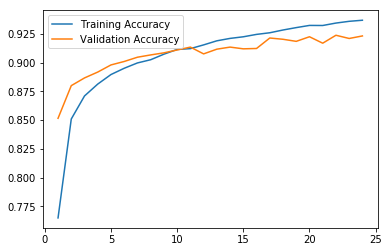

In [8]:
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', "Validation Accuracy"))
plt.show()

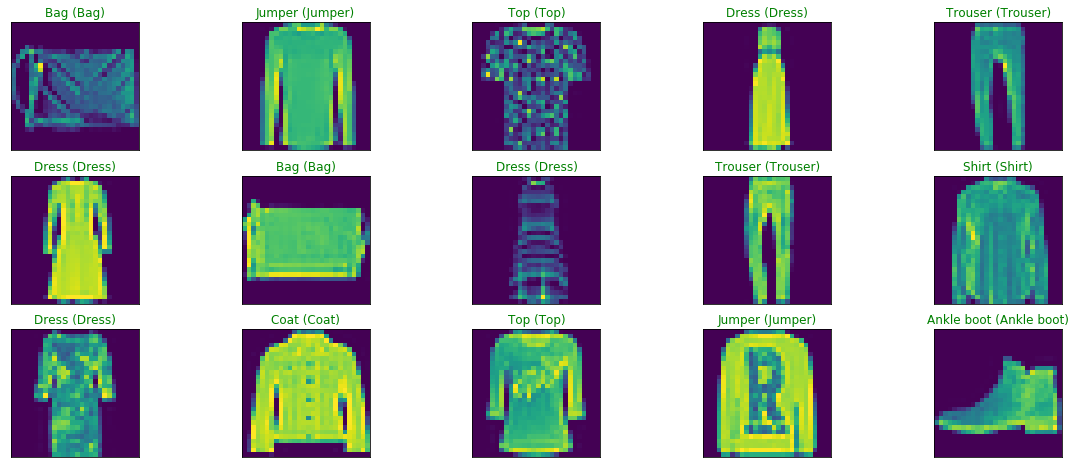

In [9]:
predictions = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(predictions[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))